In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Datos Externos

In [2]:
file_name = "CensusAPI/Current_Population_Survey"
años = range(2010, 2024)
dataframes_por_año = {}
for año in años:
    filename = f"{file_name}{año}.json"
    dataframes_por_año[año] = pd.read_json(filename)

In [3]:
#Revisión del número de registros
total_filas=0
for año in años:
    n_filas=dataframes_por_año[año].shape[0]
    total_filas += n_filas
    print(f"Tamaño dataframe del año {año}", dataframes_por_año[año].shape)
print("El total de registros es de",total_filas)    

Tamaño dataframe del año 2010 (136572, 14)
Tamaño dataframe del año 2011 (134703, 14)
Tamaño dataframe del año 2012 (132892, 14)
Tamaño dataframe del año 2013 (133368, 14)
Tamaño dataframe del año 2014 (131950, 14)
Tamaño dataframe del año 2015 (131416, 14)
Tamaño dataframe del año 2016 (129132, 14)
Tamaño dataframe del año 2017 (126840, 14)
Tamaño dataframe del año 2018 (123743, 14)
Tamaño dataframe del año 2019 (117973, 14)
Tamaño dataframe del año 2020 (97758, 14)
Tamaño dataframe del año 2021 (109674, 14)
Tamaño dataframe del año 2022 (105630, 14)
Tamaño dataframe del año 2023 (100656, 14)
El total de registros es de 1712307


In [4]:
dataframes_por_año[2011].info()

<class 'pandas.core.frame.DataFrame'>
Index: 134703 entries, 0 to 134702
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   HRNUMHOU  134703 non-null  int64  
 1   PTERNH1O  134703 non-null  float64
 2   PEMNTVTY  134703 non-null  int64  
 3   PEFNTVTY  134703 non-null  int64  
 4   GTCBSASZ  134703 non-null  int64  
 5   GESTFIPS  134703 non-null  int64  
 6   GTCSA     134703 non-null  int64  
 7   PRCHLD    134703 non-null  int64  
 8   PRTAGE    134703 non-null  int64  
 9   PESEX     134703 non-null  int64  
 10  GTCBSA    134703 non-null  int64  
 11  HEFAMINC  134703 non-null  int64  
 12  HRHTYPE   134703 non-null  int64  
 13  state     134703 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 15.4 MB


Toda la información de las varaibles seleccionadas del censo de manejan con códigos numéricos, por lo que es correcto que todas las columnas sean del tipo int.

##### Verificación de Valores Nulos y Ceros

In [5]:
resultados = {'Año': [], 'Nulos': [], 'Ceros': []}
for año in años:
    df = dataframes_por_año[año] 
    nulos = df.isnull().sum().sum()
    ceros = (df == 0).sum().sum()
    
    resultados['Año'].append(año)
    resultados['Nulos'].append(nulos)
    resultados['Ceros'].append(ceros)
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Año  Nulos   Ceros
0   2010      0  276668
1   2011      0  272667
2   2012      0  268952
3   2013      0  268802
4   2014      0  265142
5   2015      0  257977
6   2016      0  247802
7   2017      0  244307
8   2018      0  237616
9   2019      0  225667
10  2020      0  187712
11  2021      0  210978
12  2022      0  202538
13  2023      0  193947


In [6]:
dic_nulos_ceros = {}
for año in años:
    filename = f"{file_name}{año}.json"
    dic_nulos_ceros[año] = (dataframes_por_año[año] == 0).sum()
dic_nulos_ceros[2018]

HRNUMHOU        0
PTERNH1O        3
PEMNTVTY        0
PEFNTVTY        0
GTCBSASZ    32350
GESTFIPS        0
GTCSA       72361
PRCHLD      99482
PRTAGE       1070
PESEX           0
GTCBSA      32350
HEFAMINC        0
HRHTYPE         0
state           0
dtype: int64

En todos los años se presentan un gran número de ceros, sin embargo al mirar cada columna no constituyen valores faltantes, en el caso de PRCHLD el 0 es la ausencia de hijos, PRTAGE serían los individuos que aún no tienen el año de edad. Por último las columnas GTCBSASZ,GTCBSA, los valores que reporta en 0 es por que no es un área metropolitana.

##### Valores Duplicados

In [7]:
resultados = {'Año': [], 'Duplicados': [], 'Porcentaje': []}

for año in años:
    df = dataframes_por_año[año] 
    duplicados = df.duplicated().sum()
    registros_totales = len(df)
    porcentaje = (duplicados / registros_totales) * 100
    
    resultados['Año'].append(año)
    resultados['Duplicados'].append(duplicados)
    resultados['Porcentaje'].append(porcentaje)
Cuenta_duplicados = pd.DataFrame(resultados)
print(Cuenta_duplicados)

     Año  Duplicados  Porcentaje
0   2010        4617    3.380634
1   2011        4610    3.422344
2   2012        4708    3.542726
3   2013        4752    3.563074
4   2014        4456    3.377037
5   2015        4291    3.265204
6   2016        4838    3.746554
7   2017        4754    3.748029
8   2018        4606    3.722231
9   2019        4349    3.686437
10  2020        3633    3.716320
11  2021        3942    3.594289
12  2022        3912    3.703493
13  2023        3711    3.686814


Dado que no se encontró una variable que fuese un identificador unico de cada registro, los registros no se pueden identificar como únicos o duplicados con presición, es decir puede darse el caso que un registro pueda tener la misma edad, estar en el mismo estado / condad, mismo estado civil, en el mismo rango de ingresos y con los mismos orígenes étnicos. La anterior afirmación puede verse soportada por el hecho de que le procentaje de duplicados se mantiene similar a lo largo de los años.

In [8]:
dataframes_por_año[2010].head(4)

,HRNUMHOU,PTERNH1O,PEMNTVTY,PEFNTVTY,GTCBSASZ,GESTFIPS,GTCSA,PRCHLD,PRTAGE,PESEX,GTCBSA,HEFAMINC,HRHTYPE,state
0,4,-0.01,57,57,3,1,0,3,33,2,33860,3,4,1
1,4,-0.01,57,57,3,1,0,0,7,2,33860,3,4,1
2,4,-0.01,57,57,3,1,0,0,6,1,33860,3,4,1
3,4,-0.01,57,57,3,1,0,0,10,2,33860,3,4,1


In [9]:
#Distribución de las Edades
num_dataframes = len(dataframes_por_año)
n_bins = 35
x_range = (0,40)
num_rows = 3  
num_cols = 5 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Histogramas de Ingreso total por familia en los ultimos 12 meses', fontsize = 17)
for i, (year, dataframe) in enumerate(dataframes_por_año.items()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=dataframe["PRTAGE"], ax=axes[row, col])
    axes[row, col].set_title(f"Año {year}")
    axes[row, col].set_xlabel("PRTAGE")
    axes[row, col].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

NameError: name 'fig' is not defined

En los histogramas de distribución de edades podemos observar que a nivel general no hay una concentración en las edades a nivel nacional solvo un ligero pico en las edades entre 55 a los 60 años en el 2010, y se ve como para el 2023 ese pico se ubica en el rango de los 65 a los 70 años.

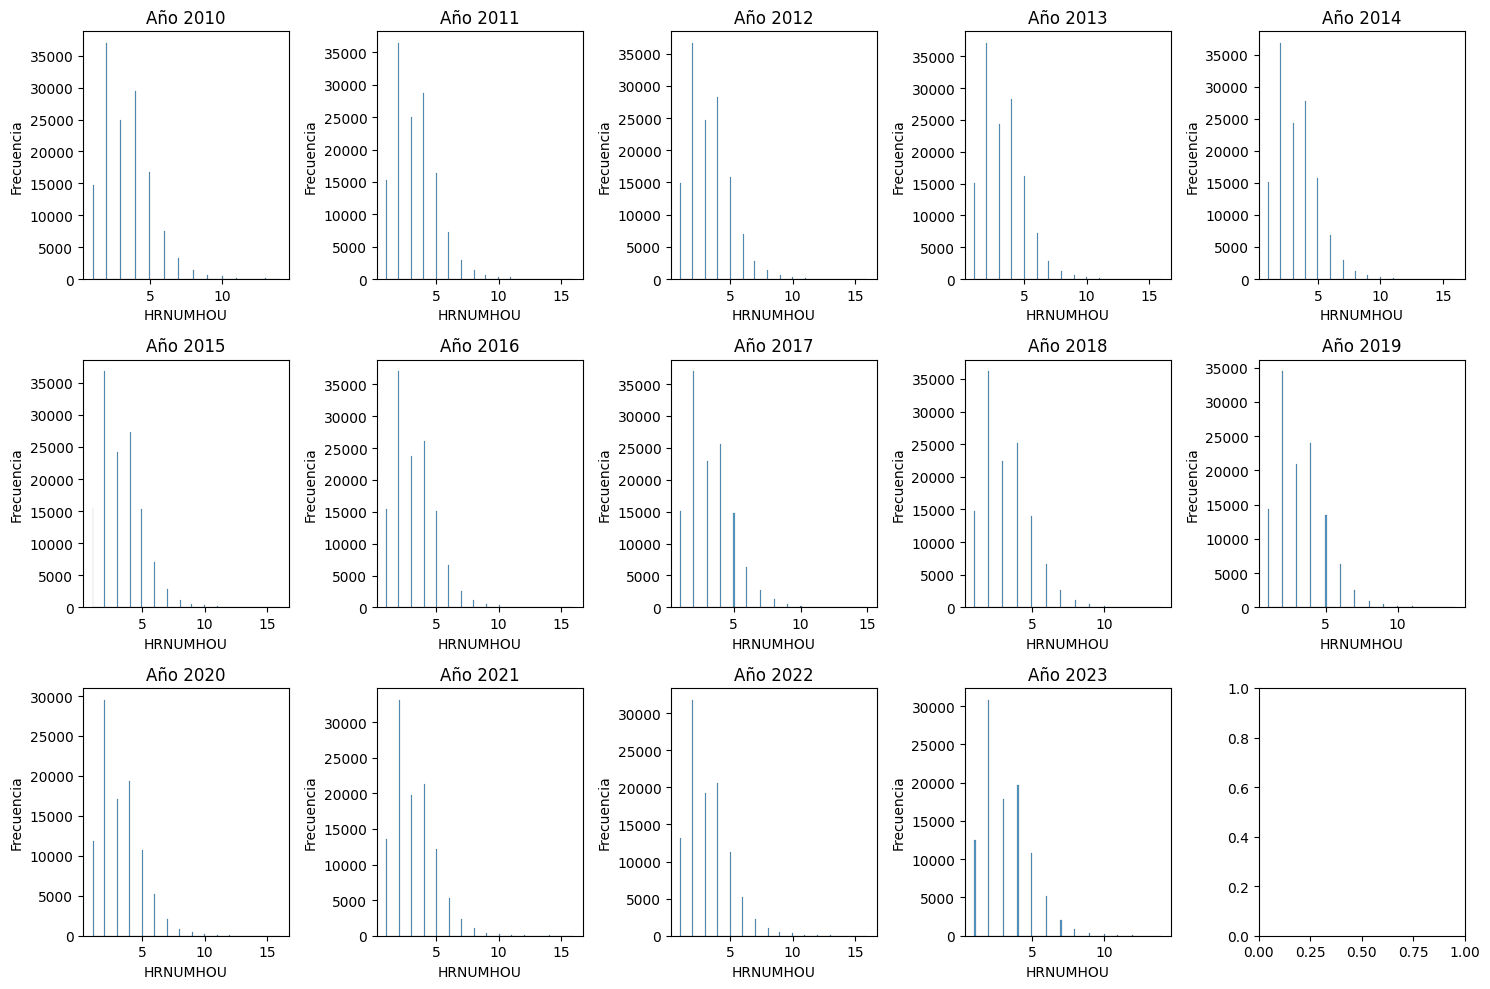

In [ ]:
#Distribución del número de personas por hogar
fig.suptitle('Histogramas de numero de personas por hogar', fontsize = 17)
num_dataframes = len(dataframes_por_año)
n_bins = 35
x_range = (0,40)
num_rows = 3  
num_cols = 5 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (year, dataframe) in enumerate(dataframes_por_año.items()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=dataframe["HRNUMHOU"], ax=axes[row, col])
    axes[row, col].set_title(f"Año {year}")
    axes[row, col].set_xlabel("HRNUMHOU")
    axes[row, col].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Las distribuciones del número de personas por hogar a lo largo de los años se mantienen similares, siendo lo más usual familias entre 2 a 4 mimebros. Se observa una ligera tendencia a que las familiar con más de 5 miembros disminuyan.

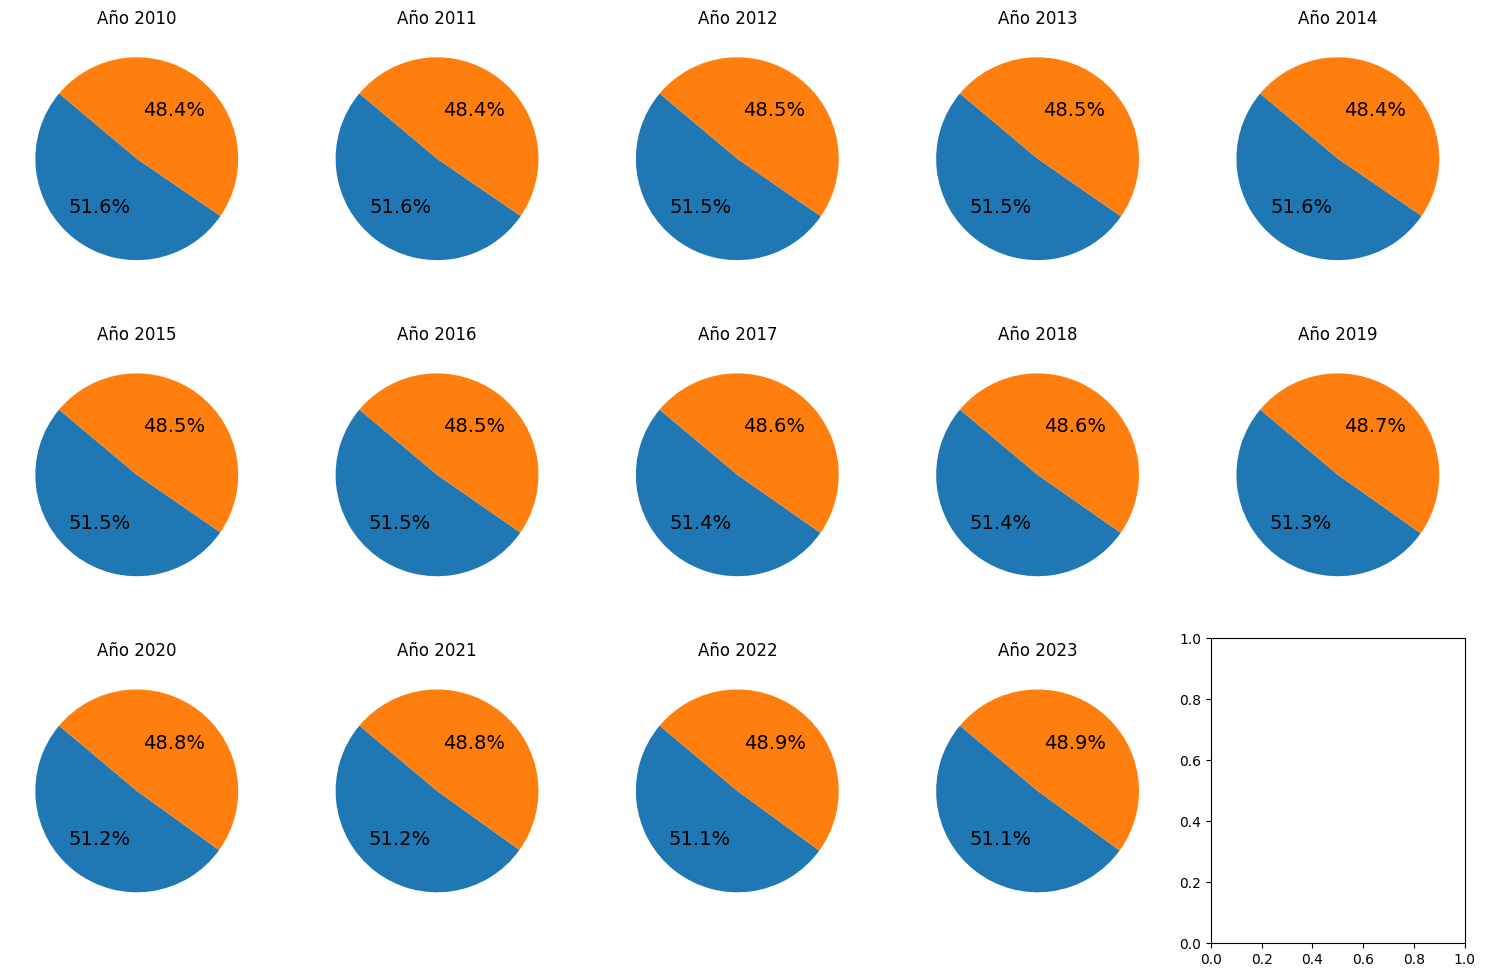

In [ ]:
# Supongamos que dataframes_por_año es un diccionario con DataFrames para diferentes años
# Obtener la cantidad total de DataFrames
num_dataframes = len(dataframes_por_año)

# Determinar el número de filas y columnas para organizar los gráficos
# Puedes ajustar estos valores según la cantidad de gráficos que desees mostrar por fila y columna
num_rows = 3  # Número de filas
num_cols = 5  # Número de columnas

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterar a través de los DataFrames y crear gráficos individuales
for i, (year, dataframe) in enumerate(dataframes_por_año.items()):
    row = i // num_cols
    col = i % num_cols
    gender_counts = dataframe["PESEX"].value_counts()
    labels = ['MUJER', 'HOMBRE']
    axes[row, col].pie(gender_counts, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 14})
    axes[row, col].set_title(f"Año {year}")

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Al observar la distribución de géneros, a los largo de los últimos 13 años se el número de hombres cada vez más se equipara al número de mujeres.

### metadata-sitios

In [ ]:
metadata_sitios = {}

for i in range(1, 4):
    nombre = "Google-Maps/metadata-sitios/"f"{i}.json"
    
    try:
        # Cargar el archivo JSON en un DataFrame
        df = pd.read_json(nombre,encoding = "utf-8", lines = True)
    
        # Agregar el DataFrame al diccionario con una clave que sea el nombre del archivo sin la extensión
        metadata_sitios[f"df_{i}"] = df
    except FileNotFoundError:
        print(f"El archivo {nombre} no fue encontrado.")

In [ ]:
total_filas=0
for i in range(1,12):
    n_filas=metadata_sitios[año].shape[0]
    total_filas += n_filas
    print(f"Tamaño dataframe del año {i}", metadata_sitios[i].shape)
print("El total de registros es de",total_filas)